In [300]:
from src import SMO
import numpy as np
import matplotlib.pyplot as plt

# Plotting Datapoints And Coloring Them

In [301]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

# Drawing a Decision Boundary Plus Datapoints

In [302]:
def draw_decision_boundary(model: SMO, X: np.ndarray, y: np.ndarray, title: str):
    def get_db() -> tuple:
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), len(X)//5),
                            np.linspace(X[:, 1].min(), X[:, 1].max(), len(X)//5))

        new_X = np.column_stack((xx.flatten(), yy.flatten()))
        preds, _ = model.predict(new_X, np.ones(len(new_X)))
        preds = preds.reshape(xx.shape)
        preds[preds > 1] = 1
        preds[preds < -1] = -1
        preds[(-1 < preds) & (preds < 1)] = 0   # the "gutter"

        return xx, yy, preds

    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)

    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    cs = ax.contourf(*get_db(), alpha=0.35)
    proxy = [plt.Rectangle((0, 0), 1, 1, fc=c) for c in ['y', 'c', 'm']]

    plt.legend(proxy, ['dots1', 'the gutter', 'dots2'])
    plt.show()

# Circles

### Generating / Loading The Data

In [303]:
circles = np.loadtxt('data/circles.csv', delimiter=',')
X_circles, y_circles = circles[:, :2], circles[:, -1]

### Making an Instance of The Model, Training The Model

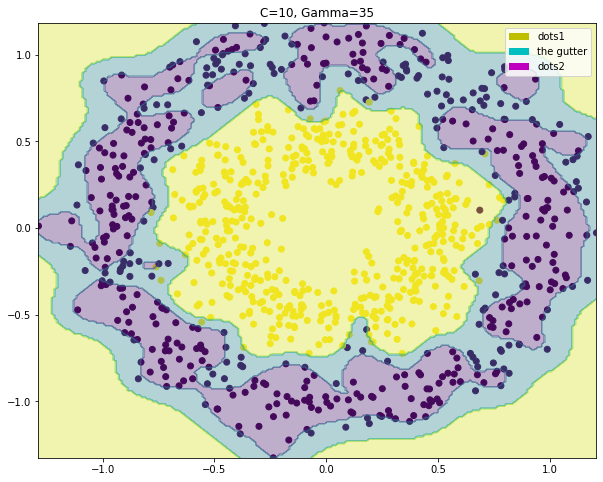

In [304]:
C = 2
GAMMA = 35
circles_model = SMO(X_circles, y_circles, 'rbf', c=C, gamma=GAMMA)

for i in range(25):
    pred, acc = circles_model.fit()
    print(f'{i}) Accuracy: {acc}{" "*20}', end='\r')

draw_decision_boundary(circles_model, X_circles, y_circles, f'C={C}, Gamma={GAMMA}')

### Getting Support Vectors of The Model

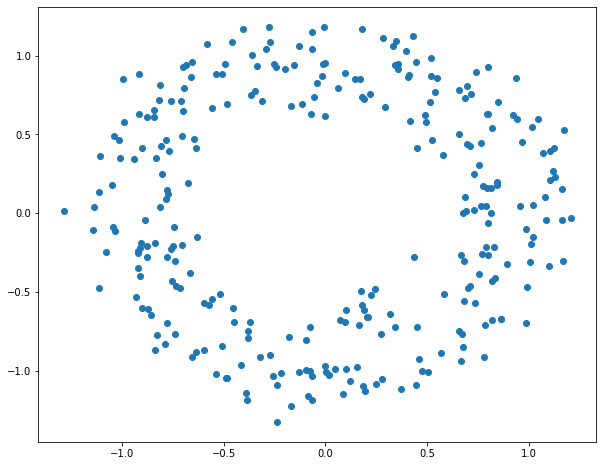

289

In [305]:
sv = circles_model.get_support_vectors()
plot_datapoints(sv, None)
len(sv)